In [27]:
# 1. 본문에서는 구군별로 그룹화하여 행복지수 요소와의 상관관계를 분석했다.
# 이를 서울특별시 '구군'별로 행복지수 요소와의 상관관계를 분석하고 요소 간의 연관성을 설명하세요.
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

happy_life = read_excel("../resources/9장/대한민국행복지도_삶의만족도.xlsx")
happy_health = read_excel("../resources/9장/대한민국행복지도_건강.xlsx")
happy_safe = read_excel("../resources/9장/대한민국행복지도_안전.xlsx")
happy_environ = read_excel("../resources/9장/대한민국행복지도_환경.xlsx")
happy_econo = read_excel("../resources/9장/대한민국행복지도_경제.xlsx")
happy_edu = read_excel("../resources/9장/대한민국행복지도_교육.xlsx")
happy_relation = read_excel("../resources/9장/대한민국행복지도_관계및사회참여.xlsx")
happy_leisure = read_excel("../resources/9장/대한민국행복지도_여가.xlsx")

area = happy_life[happy_life["시도"] == "서울특별시"]["구군"].unique()
happy_merge = DataFrame({"구군": area})

life = happy_life["삶의 만족도"].groupby(by=happy_life["구군"]).mean()
happy_merge = merge(happy_merge, life, on="구군")

health = happy_health["평균"].groupby(by=happy_health["구군"]).mean()
happy_merge = merge(happy_merge, health.rename("건강"), on="구군")

safe = happy_safe["평균"].groupby(by=happy_safe["구군"]).mean()
happy_merge = merge(happy_merge, safe.rename("안전"), on="구군")

environ = happy_environ["평균"].groupby(by=happy_environ["구군"]).mean()
happy_merge = merge(happy_merge, environ.rename("환경"), on="구군")

econo = happy_econo["평균"].groupby(by=happy_econo["구군"]).mean()
happy_merge = merge(happy_merge, econo.rename("경제"), on="구군")

edu = happy_edu["평균"].groupby(by=happy_edu["구군"]).mean()
happy_merge = merge(happy_merge, edu.rename("교육"), on="구군")

relation = happy_relation["평균"].groupby(by=happy_relation["구군"]).mean()
happy_merge = merge(happy_merge, relation.rename("관계및사회참여"), on="구군")

leisure = happy_leisure["평균"].groupby(by=happy_leisure["구군"]).mean()
happy_merge = merge(happy_merge, leisure.rename("여가"), on="구군")

happy_merge.head()

,구군,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
0,종로구,0.443700,0.922000,0.747000,0.46370,1.000000,0.683900,0.74250,0.6331
1,중구,0.336517,0.714983,0.532967,0.39485,0.676533,0.518717,0.47435,0.4401
2,용산구,0.616100,0.589800,0.553700,0.50300,0.691500,0.267900,0.43170,0.2817
3,성동구,0.472900,0.479400,0.534700,0.41960,0.653300,0.246400,0.41820,0.3257
4,광진구,0.404100,0.637300,0.607200,0.49920,0.444500,0.487900,0.35190,0.3313


In [28]:
happy_merge.corr(numeric_only=True)

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
삶의 만족도,1.000000,0.278078,0.001577,-0.236015,0.435007,0.560736,0.246283,-0.015894
건강,0.278078,1.000000,0.526684,-0.221940,0.457899,0.408688,0.325174,0.529692
안전,0.001577,0.526684,1.000000,-0.286672,0.233186,-0.024545,-0.215290,0.482690
환경,-0.236015,-0.221940,-0.286672,1.000000,-0.573838,0.038951,0.012447,-0.259865
경제,0.435007,0.457899,0.233186,-0.573838,1.000000,0.233678,0.302810,0.542861
교육,0.560736,0.408688,-0.024545,0.038951,0.233678,1.000000,0.488805,0.286615
관계및사회참여,0.246283,0.325174,-0.215290,0.012447,0.302810,0.488805,1.000000,0.529467
여가,-0.015894,0.529692,0.482690,-0.259865,0.542861,0.286615,0.529467,1.000000


<Figure size 1500x600 with 0 Axes>

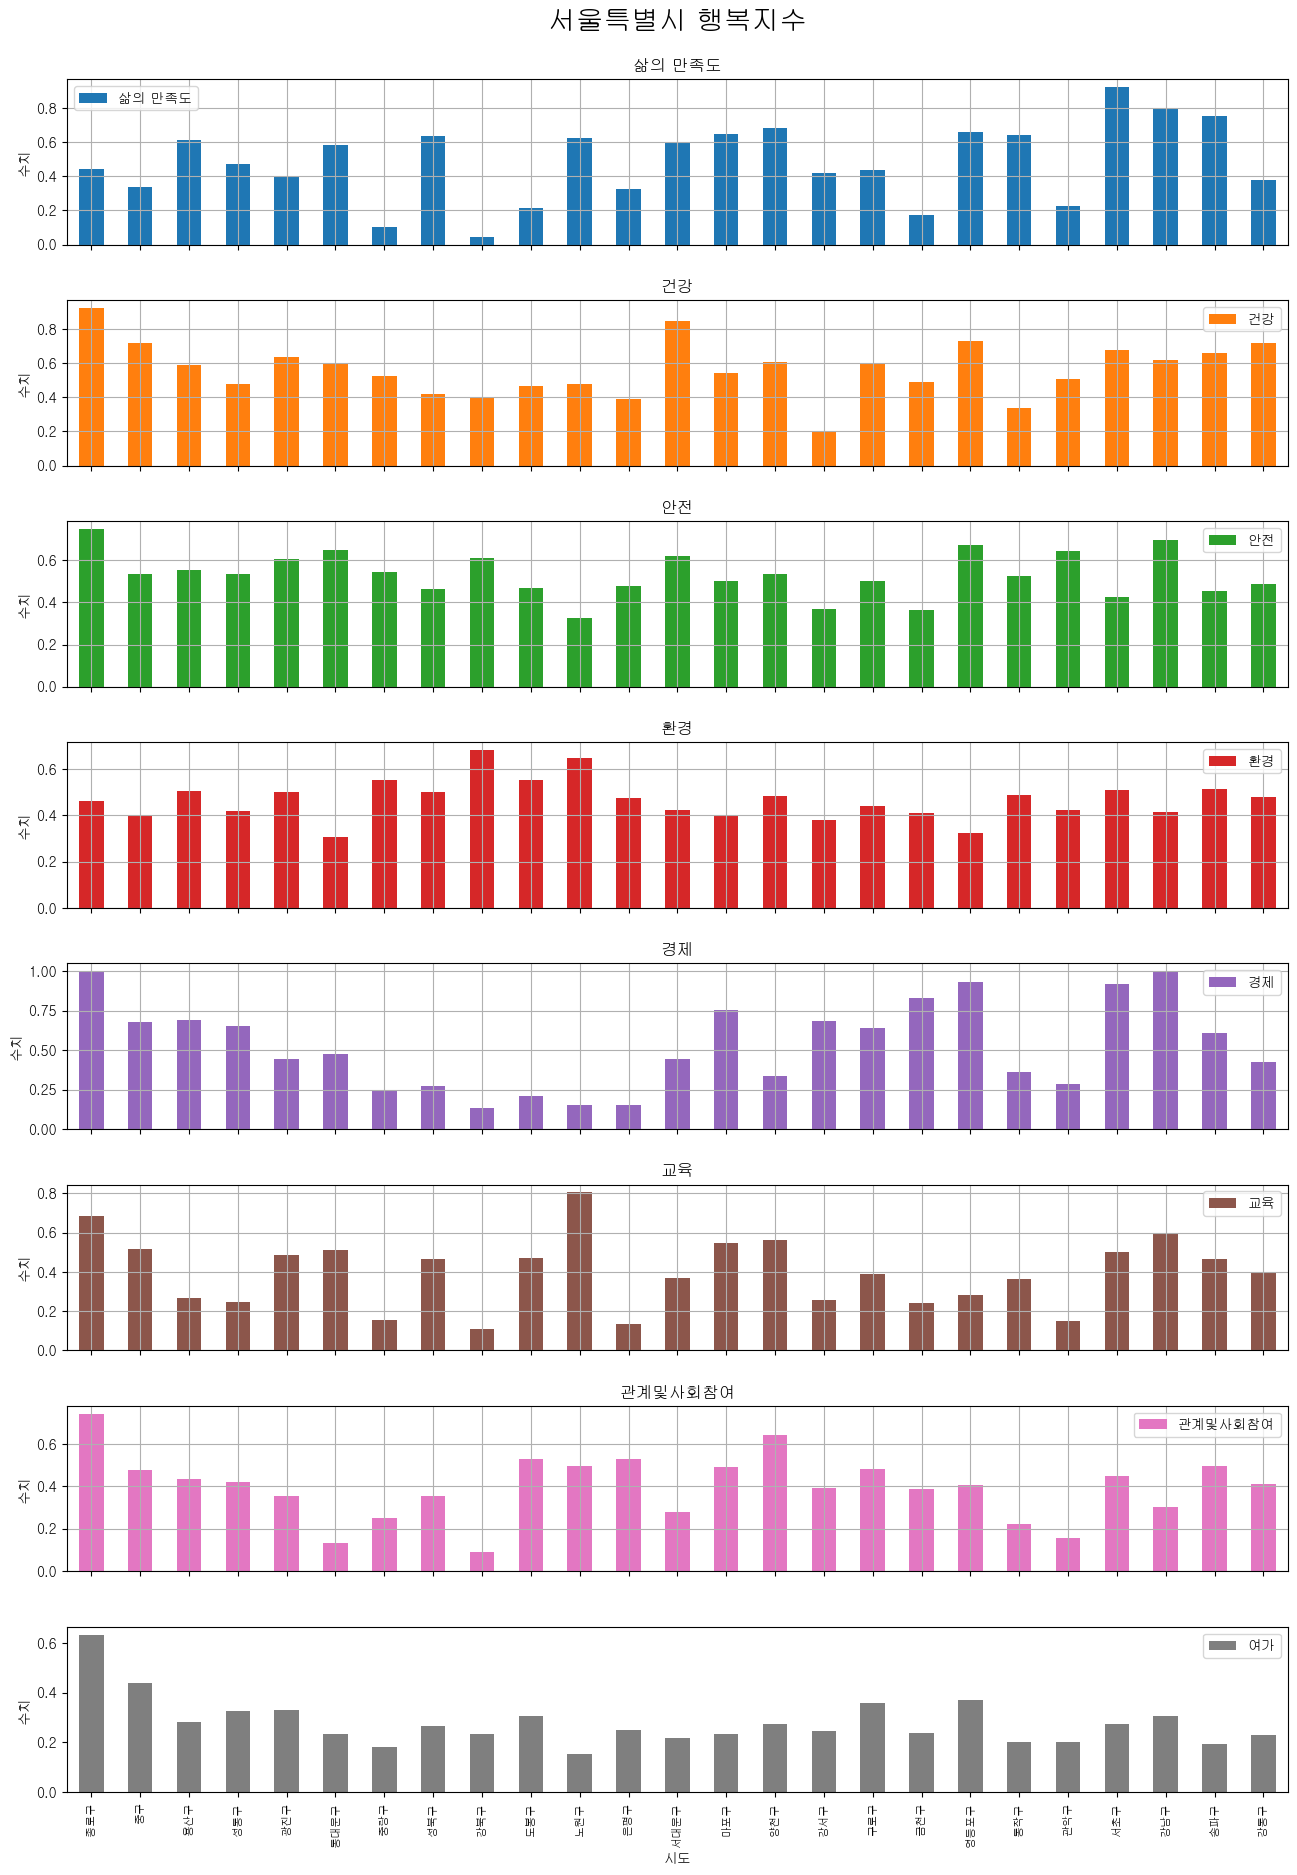

In [73]:
# 2. 서울특별시 '구군'별 지역에 따라 얼마나 차이가 나는지 세로 막대 그래프로 시각화하고,
# 이를 세로 막대 그래프의 서브플롯을 활성화하여 8개의 요소들을 구분해서 출력하세요.
from matplotlib import *

plt.figure(figsize=(15, 6))
rcParams["font.family"] = "gulim"

happy_merge.plot(
    kind="bar",
    xlabel="시도",
    ylabel="수치",
    figsize=(15, 20),
    grid=True,
    subplots=True,
)
plt.tight_layout(pad=8, h_pad=2)
plt.title("서울특별시 행복지수", y=10.6, fontdict={"weight": "bold", "size": 20})
plt.xticks(range(len(happy_merge["구군"])), happy_merge["구군"], fontsize=8)
plt.legend()
plt.grid()
plt.show()

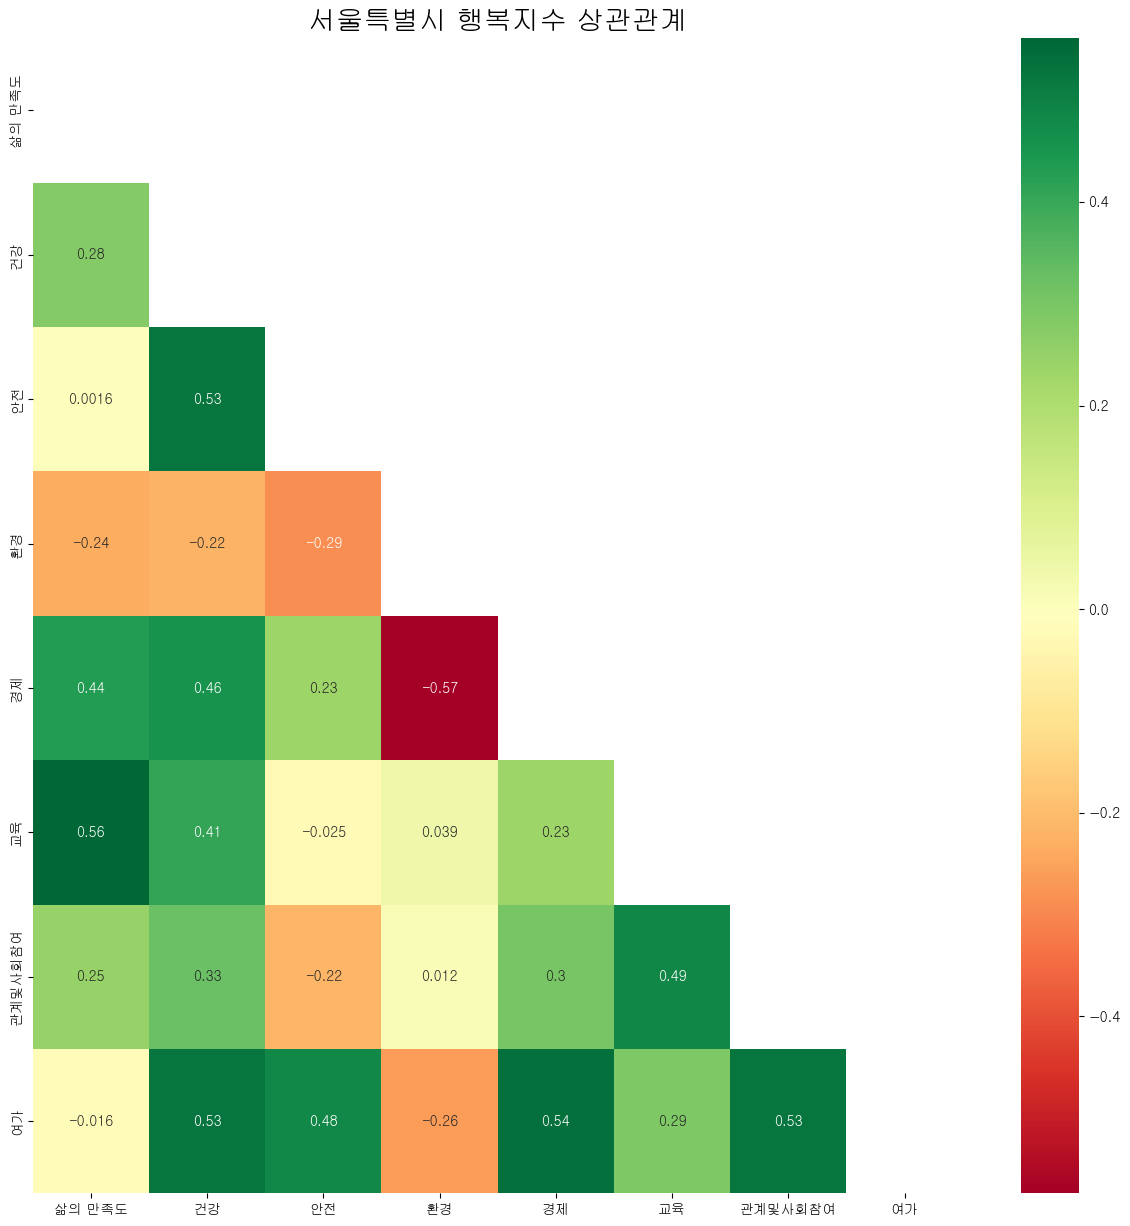

In [78]:
# 3. 1번에서의 상관관계 분석 결과를 히트맵 그래프로 시각화하고 이를 시본 라이브러리를 추가로 이용하여 데이터 범위를 다양한 색상으로 출력하세요.
from numpy import *

plt.figure(figsize=(15, 15))

corr_mat = happy_merge.corr(numeric_only=True)
upp_mat = triu(corr_mat)

sns.heatmap(data=corr_mat, annot=True, cmap="RdYlGn", mask=upp_mat)

plt.title("서울특별시 행복지수 상관관계", weight="bold", fontsize=20)
plt.show()

In [80]:
# 4. 서울특별시 외에도 다른 구군의 '구군'별로 행복지수 요소와의 상관관계를 분석하고 요소 간의 연관성을 찾아보세요.

area = happy_life[happy_life["시도"] == "부산광역시"]["구군"].unique()
happy_merge = DataFrame({"구군": area})

life = happy_life["삶의 만족도"].groupby(by=happy_life["구군"]).mean()
happy_merge = merge(happy_merge, life, on="구군")

health = happy_health["평균"].groupby(by=happy_health["구군"]).mean()
happy_merge = merge(happy_merge, health.rename("건강"), on="구군")

safe = happy_safe["평균"].groupby(by=happy_safe["구군"]).mean()
happy_merge = merge(happy_merge, safe.rename("안전"), on="구군")

environ = happy_environ["평균"].groupby(by=happy_environ["구군"]).mean()
happy_merge = merge(happy_merge, environ.rename("환경"), on="구군")

econo = happy_econo["평균"].groupby(by=happy_econo["구군"]).mean()
happy_merge = merge(happy_merge, econo.rename("경제"), on="구군")

edu = happy_edu["평균"].groupby(by=happy_edu["구군"]).mean()
happy_merge = merge(happy_merge, edu.rename("교육"), on="구군")

relation = happy_relation["평균"].groupby(by=happy_relation["구군"]).mean()
happy_merge = merge(happy_merge, relation.rename("관계및사회참여"), on="구군")

leisure = happy_leisure["평균"].groupby(by=happy_leisure["구군"]).mean()
happy_merge = merge(happy_merge, leisure.rename("여가"), on="구군")

happy_merge.head()

,구군,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
0,중구,0.336517,0.714983,0.532967,0.394850,0.676533,0.518717,0.474350,0.440100
1,서구,0.262820,0.556820,0.366980,0.488525,0.402360,0.596920,0.376575,0.198440
2,동구,0.308517,0.549083,0.436920,0.541083,0.496667,0.609550,0.441650,0.300267
3,영도구,0.227300,0.418100,0.440100,0.550800,0.221700,0.408700,0.009400,0.124300
4,부산진구,0.423900,0.598900,0.288300,0.456300,0.459800,0.599500,0.127000,0.119300


In [83]:
happy_merge.corr(numeric_only=True)

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
삶의 만족도,1.000000,0.008426,0.377289,0.397642,0.019127,0.078345,0.445796,-0.047536
건강,0.008426,1.000000,0.220567,-0.206558,0.076338,0.347876,-0.055748,-0.093309
안전,0.377289,0.220567,1.000000,0.214805,0.179693,-0.383915,0.120182,0.375980
환경,0.397642,-0.206558,0.214805,1.000000,-0.168107,0.037792,0.274982,0.479295
경제,0.019127,0.076338,0.179693,-0.168107,1.000000,-0.441745,0.199334,0.350187
교육,0.078345,0.347876,-0.383915,0.037792,-0.441745,1.000000,0.406218,-0.056750
관계및사회참여,0.445796,-0.055748,0.120182,0.274982,0.199334,0.406218,1.000000,0.542484
여가,-0.047536,-0.093309,0.375980,0.479295,0.350187,-0.056750,0.542484,1.000000


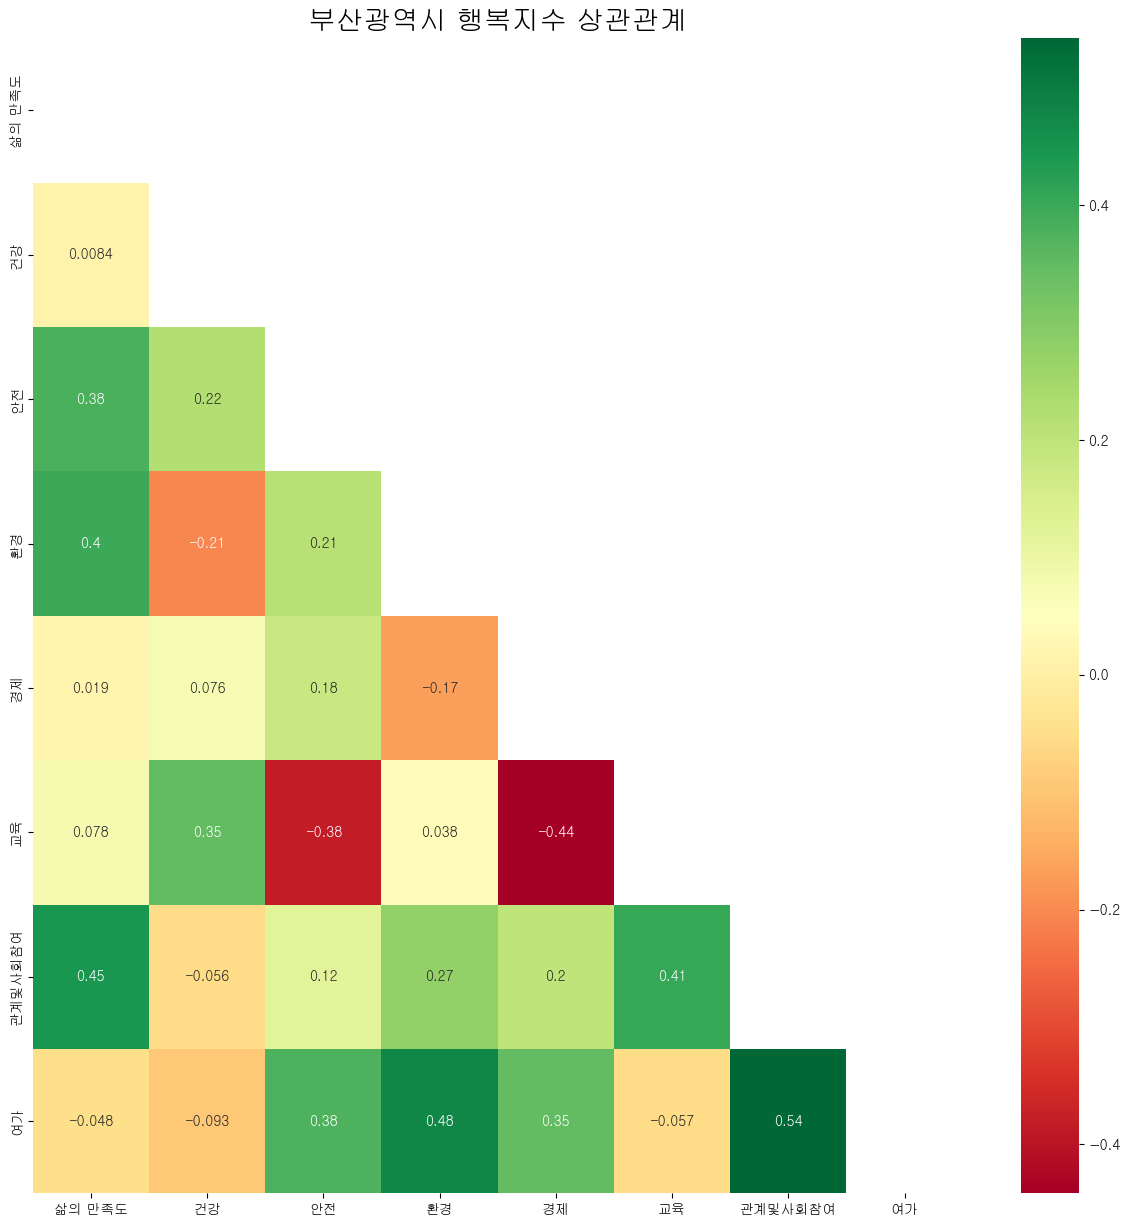

In [85]:
# 5. 4번에서의 상관관계 분석 결과를 히트맵 그래프로 시각화하고, 기본적인 통계와 집계를 수행하여 막대 그래프로 시각화해서 요소 간의 의미 있는 특징을 찾아보세요.

from numpy import *

plt.figure(figsize=(15, 15))

corr_mat = happy_merge.corr(numeric_only=True)
upp_mat = triu(corr_mat)

sns.heatmap(data=corr_mat, annot=True, cmap="RdYlGn", mask=upp_mat)

plt.title("부산광역시 행복지수 상관관계", weight="bold", fontsize=20)
plt.show()